Intializing the functions + parameters + data for the training and test.

In [27]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.nn as nn
from torch import optim
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

#Train Function
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs, path, print_progress=True):
    #Initializing arrays to save the progress loss and accuracy for each epoch
    model.train()
    train_loss_history = []
    train_accuracy_history = []
    test_loss_history = []
    test_accuracy_history = []

    for epoch in range(num_epochs):
        # Training Loop
        model.train()
        train_total_loss = 0.0
        train_correct = 0
        train_total = 0

        for data, labels in tqdm(train_loader, desc=f'Training Epoch {epoch}/{num_epochs}', unit='batch', disable=not print_progress):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            train_total_loss += loss.item()

            _, predicted = torch.max(output, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_average_loss = train_total_loss / len(train_loader)
        train_accuracy = train_correct / train_total

        train_loss_history.append(train_average_loss)
        train_accuracy_history.append(train_accuracy)

        # Testing
        model.eval()
        test_total_loss = 0.0
        test_correct = 0
        test_total = 0

        with torch.no_grad():
            for data, labels in test_loader:
                output = model(data)
                loss = criterion(output, labels)
                test_total_loss += loss.item()

                _, predicted = torch.max(output, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()

        test_average_loss = test_total_loss / len(test_loader)
        test_accuracy = test_correct / test_total

        test_loss_history.append(test_average_loss)
        test_accuracy_history.append(test_accuracy)

        if print_progress:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_average_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%, Test Loss: {test_average_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')

    # Plot loss and accuracy
    plt.figure(figsize=(10, 10))

    # Plot training loss
    plt.subplot(2, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    # Plot training accuracy
    plt.subplot(2, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracy_history, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()

    # Plot test loss
    plt.subplot(2, 2, 3)
    plt.plot(range(1, num_epochs + 1), test_loss_history, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Test Loss')
    plt.legend()

    # Plot test accuracy
    plt.subplot(2, 2, 4)
    plt.plot(range(1, num_epochs + 1), test_accuracy_history, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Test Accuracy')
    plt.legend()

    # Save the plots as one image
    plt.tight_layout()
    plt.savefig(path)

    return model

#Testing the Model
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, labels in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

def view_data_sample(loader):
    image, label = next(iter(loader))
    plt.figure(figsize=(16, 8))
    plt.axis('off')
    plt.imshow(make_grid(image, nrow=16).permute((1, 2, 0)))

def count_parameters(model):
    total_params = 0
    for name, parameter in model.named_parameters():
        if parameter.requires_grad:
            print(f"Layer: {name}, Parameters: {parameter.numel()}")
            total_params += parameter.numel()
    print(f"Total Trainable Parameters: {total_params}")
    return total_params


def splice_batch(X, Y, num_of_labels, prints=True):
    if prints:
        print('input: ', end="")
        print("\t X shape: ", X.shape, end='\t')
        print("\t Y shape: ", Y.shape)
    X = X[Y < num_of_labels]
    Y = Y[Y < num_of_labels]
    if prints:
        print('output: ', end="")
        print("\t X shape: ", X.shape, end='\t')
        print("\t Y shape: ", Y.shape)
    return X, Y



# Parameters
batch_size = 128
lr = 0.001

# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# Data for the first model, only 3 classes
train_data_3, train_labels_3 = splice_batch(trainset.data, trainset.targets, num_of_labels=3)
train_data_3 = train_data_3.float() / 255.0  # Normalization
train_dataset_3 = torch.utils.data.TensorDataset(train_data_3, train_labels_3)
train_loader_3 = torch.utils.data.DataLoader(train_dataset_3, batch_size=batch_size, shuffle=True)

test_data_3, test_labels_3 = splice_batch(testset.data, testset.targets, num_of_labels=3)
test_data_3 = test_data_3.float() / 255.0  # Normalization
test_dataset_3 = torch.utils.data.TensorDataset(test_data_3, test_labels_3)
test_loader_3 = torch.utils.data.DataLoader(test_dataset_3, batch_size=batch_size, shuffle=False)



# Data for the first model, only 7 classes
train_data_7, train_labels_7 = splice_batch(trainset.data, trainset.targets, num_of_labels=7)
train_data_7 = train_data_7.float() / 255.0  # Normalization
train_dataset_7 = torch.utils.data.TensorDataset(train_data_7, train_labels_7)
train_loader_7 = torch.utils.data.DataLoader(train_dataset_7, batch_size=batch_size, shuffle=False)

test_data_7, test_labels_7 = splice_batch(testset.data, testset.targets, num_of_labels=7)
test_data_7 = test_data_7.float() / 255.0  # Normalization
test_dataset_7 = torch.utils.data.TensorDataset(test_data_7, test_labels_7)
test_loader_7 = torch.utils.data.DataLoader(test_dataset_7, batch_size=batch_size, shuffle=False)

input: 	 X shape:  torch.Size([60000, 28, 28])		 Y shape:  torch.Size([60000])
output: 	 X shape:  torch.Size([18000, 28, 28])		 Y shape:  torch.Size([18000])
input: 	 X shape:  torch.Size([10000, 28, 28])		 Y shape:  torch.Size([10000])
output: 	 X shape:  torch.Size([3000, 28, 28])		 Y shape:  torch.Size([3000])
input: 	 X shape:  torch.Size([60000, 28, 28])		 Y shape:  torch.Size([60000])
output: 	 X shape:  torch.Size([42000, 28, 28])		 Y shape:  torch.Size([42000])
input: 	 X shape:  torch.Size([10000, 28, 28])		 Y shape:  torch.Size([10000])
output: 	 X shape:  torch.Size([7000, 28, 28])		 Y shape:  torch.Size([7000])


In [28]:
# The models architecture and classes:
class model_1(nn.Module):
    def __init__(self):
        super(model_1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 62)
        self.fc2 = nn.Linear(62, 3)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

class model_2(nn.Module):
    def __init__(self):
        super(model_2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 62)
        self.fc2 = nn.Linear(62, 7)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

class model_3(nn.Module):
    def __init__(self):
        super(model_3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 60)
        self.fc2 = nn.Linear(60, 28)
        self.fc3 = nn.Linear(28, 14)
        self.fc4 = nn.Linear(14, 7)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        x = F.relu(x)

        x = self.fc4(x)
        return x

class model_4(nn.Module):
    def __init__(self):
        super(model_4, self).__init__()

        self.conv1 = nn.Conv2d(1, 20, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(20, 40, kernel_size=3, stride=1, padding=1)
        self.dropout2 = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(40, 90, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        self.fc = nn.Linear(810, 7)  # Output size is 7 for 7 classes

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout2(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [29]:
MODE = "TEST" # Choose the mode to run the code
#"TRAIN" to train the models and save them
#"TRAIN(No.)" to train a specific model (No. should be 1/2/3/4 only)
#"TEST" to load and test the saved models

In [30]:
if MODE == "TEST":
    # Load the saved models
    model_paths = [
        '/content/output/saved_models/model_1_trained.pth',
        '/content/output/saved_models/model_2_trained.pth',
        '/content/output/saved_models/model_3_trained.pth',
        '/content/output/saved_models/model_4_trained.pth'
    ]

    # Test each model
    for i, model_path in enumerate(model_paths, start=1):
        # Determine the appropriate test loader based on the model index
        if i == 1:
            current_test_loader = test_loader_3
        else:
            current_test_loader = test_loader_7

        # Instantiate the respective model class
        model_class = globals()[f'model_{i}']  # Get the model class dynamically
        model = model_class()

        # Load the trained model state dictionary
        model.load_state_dict(torch.load(model_path))

        # Set the model to evaluation mode
        model.eval()

        # Test the model
        print(f"Testing Model {i}:")
        test_model(model, current_test_loader)

Testing Model 1:
Test Accuracy: 97.37%
Testing Model 2:
Test Accuracy: 85.27%
Testing Model 3:
Test Accuracy: 85.57%
Testing Model 4:
Test Accuracy: 89.84%


Training Epoch 0/20: 100%|██████████| 141/141 [00:00<00:00, 318.27batch/s]


Epoch 1/20, Train Loss: 0.2157, Train Accuracy: 94.17%, Test Loss: 0.1391, Test Accuracy: 95.47%


Training Epoch 1/20: 100%|██████████| 141/141 [00:00<00:00, 302.70batch/s]


Epoch 2/20, Train Loss: 0.1193, Train Accuracy: 96.40%, Test Loss: 0.1236, Test Accuracy: 96.10%


Training Epoch 2/20: 100%|██████████| 141/141 [00:00<00:00, 320.88batch/s]


Epoch 3/20, Train Loss: 0.1052, Train Accuracy: 96.89%, Test Loss: 0.1130, Test Accuracy: 96.17%


Training Epoch 3/20: 100%|██████████| 141/141 [00:00<00:00, 322.22batch/s]


Epoch 4/20, Train Loss: 0.0956, Train Accuracy: 97.03%, Test Loss: 0.1027, Test Accuracy: 96.73%


Training Epoch 4/20: 100%|██████████| 141/141 [00:00<00:00, 311.08batch/s]


Epoch 5/20, Train Loss: 0.0884, Train Accuracy: 97.19%, Test Loss: 0.1075, Test Accuracy: 96.57%


Training Epoch 5/20: 100%|██████████| 141/141 [00:00<00:00, 278.83batch/s]


Epoch 6/20, Train Loss: 0.0824, Train Accuracy: 97.38%, Test Loss: 0.0954, Test Accuracy: 96.80%


Training Epoch 6/20: 100%|██████████| 141/141 [00:00<00:00, 304.92batch/s]


Epoch 7/20, Train Loss: 0.0773, Train Accuracy: 97.52%, Test Loss: 0.0933, Test Accuracy: 96.83%


Training Epoch 7/20: 100%|██████████| 141/141 [00:00<00:00, 298.60batch/s]


Epoch 8/20, Train Loss: 0.0731, Train Accuracy: 97.56%, Test Loss: 0.0888, Test Accuracy: 97.03%


Training Epoch 8/20: 100%|██████████| 141/141 [00:00<00:00, 304.13batch/s]


Epoch 9/20, Train Loss: 0.0700, Train Accuracy: 97.64%, Test Loss: 0.0876, Test Accuracy: 97.07%


Training Epoch 9/20: 100%|██████████| 141/141 [00:00<00:00, 306.08batch/s]


Epoch 10/20, Train Loss: 0.0680, Train Accuracy: 97.78%, Test Loss: 0.1010, Test Accuracy: 96.63%


Training Epoch 10/20: 100%|██████████| 141/141 [00:00<00:00, 254.97batch/s]


Epoch 11/20, Train Loss: 0.0643, Train Accuracy: 97.89%, Test Loss: 0.0837, Test Accuracy: 97.33%


Training Epoch 11/20: 100%|██████████| 141/141 [00:00<00:00, 191.29batch/s]


Epoch 12/20, Train Loss: 0.0617, Train Accuracy: 97.91%, Test Loss: 0.0867, Test Accuracy: 97.33%


Training Epoch 12/20: 100%|██████████| 141/141 [00:00<00:00, 189.59batch/s]


Epoch 13/20, Train Loss: 0.0580, Train Accuracy: 98.03%, Test Loss: 0.0839, Test Accuracy: 97.27%


Training Epoch 13/20: 100%|██████████| 141/141 [00:00<00:00, 207.57batch/s]


Epoch 14/20, Train Loss: 0.0571, Train Accuracy: 98.07%, Test Loss: 0.0850, Test Accuracy: 97.17%


Training Epoch 14/20: 100%|██████████| 141/141 [00:00<00:00, 310.81batch/s]


Epoch 15/20, Train Loss: 0.0559, Train Accuracy: 98.02%, Test Loss: 0.0851, Test Accuracy: 97.07%


Training Epoch 15/20: 100%|██████████| 141/141 [00:00<00:00, 293.30batch/s]


Epoch 16/20, Train Loss: 0.0541, Train Accuracy: 98.17%, Test Loss: 0.0840, Test Accuracy: 97.37%


Training Epoch 16/20: 100%|██████████| 141/141 [00:00<00:00, 296.91batch/s]


Epoch 17/20, Train Loss: 0.0524, Train Accuracy: 98.19%, Test Loss: 0.0878, Test Accuracy: 97.03%


Training Epoch 17/20: 100%|██████████| 141/141 [00:00<00:00, 288.05batch/s]


Epoch 18/20, Train Loss: 0.0506, Train Accuracy: 98.32%, Test Loss: 0.0840, Test Accuracy: 97.37%


Training Epoch 18/20: 100%|██████████| 141/141 [00:00<00:00, 300.23batch/s]


Epoch 19/20, Train Loss: 0.0481, Train Accuracy: 98.32%, Test Loss: 0.0906, Test Accuracy: 96.90%


Training Epoch 19/20: 100%|██████████| 141/141 [00:00<00:00, 282.11batch/s]


Epoch 20/20, Train Loss: 0.0472, Train Accuracy: 98.41%, Test Loss: 0.0809, Test Accuracy: 97.37%
Test Accuracy: 97.37%
Layer: fc1.weight, Parameters: 48608
Layer: fc1.bias, Parameters: 62
Layer: fc2.weight, Parameters: 186
Layer: fc2.bias, Parameters: 3
Total Trainable Parameters: 48859
48859
Trained model-1 saved successfully at: /content/output/saved_models/model_1_trained.pth


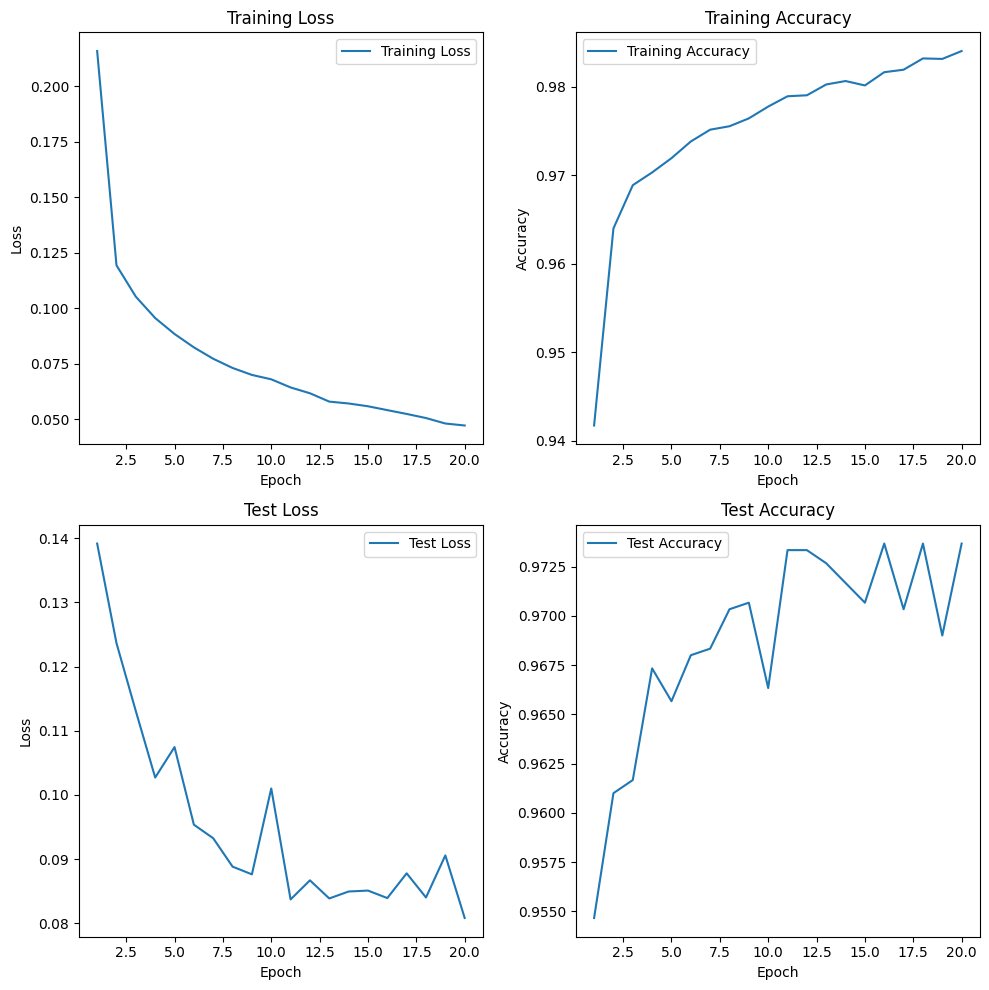

In [16]:
if MODE=="TRAIN" or MODE=="TRAIN1":
    # Train the first model
    model_1 = model_1()
    criterion_1 = nn.CrossEntropyLoss()
    optimizer_1 = optim.Adam(model_1.parameters(), lr=lr)
    model_1 = train_model(model_1, train_loader_3, test_loader_3, criterion_1, optimizer_1, 20, "/content/output/saved_models/model1.png")

    # Test the first model
    test_model(model_1, test_loader_3)
    print(count_parameters(model_1))

    # Save the trained model
    model_path = os.path.join('/content/output/saved_models', 'model_1_trained.pth')
    torch.save(model_1.state_dict(), model_path)
    print(f"Trained model-1 saved successfully at: {model_path}")

Training Epoch 0/25: 100%|██████████| 329/329 [00:01<00:00, 178.63batch/s]


Epoch 1/25, Train Loss: 0.6733, Train Accuracy: 76.77%, Test Loss: 0.5608, Test Accuracy: 79.46%


Training Epoch 1/25: 100%|██████████| 329/329 [00:02<00:00, 129.98batch/s]


Epoch 2/25, Train Loss: 0.4952, Train Accuracy: 82.05%, Test Loss: 0.5162, Test Accuracy: 81.20%


Training Epoch 2/25: 100%|██████████| 329/329 [00:03<00:00, 87.30batch/s] 


Epoch 3/25, Train Loss: 0.4588, Train Accuracy: 83.16%, Test Loss: 0.4931, Test Accuracy: 82.06%


Training Epoch 3/25: 100%|██████████| 329/329 [00:02<00:00, 141.07batch/s]


Epoch 4/25, Train Loss: 0.4349, Train Accuracy: 84.01%, Test Loss: 0.4754, Test Accuracy: 82.60%


Training Epoch 4/25: 100%|██████████| 329/329 [00:02<00:00, 154.30batch/s]


Epoch 5/25, Train Loss: 0.4170, Train Accuracy: 84.62%, Test Loss: 0.4641, Test Accuracy: 83.17%


Training Epoch 5/25: 100%|██████████| 329/329 [00:01<00:00, 310.93batch/s]


Epoch 6/25, Train Loss: 0.4029, Train Accuracy: 85.07%, Test Loss: 0.4548, Test Accuracy: 83.39%


Training Epoch 6/25: 100%|██████████| 329/329 [00:01<00:00, 304.91batch/s]


Epoch 7/25, Train Loss: 0.3906, Train Accuracy: 85.47%, Test Loss: 0.4496, Test Accuracy: 83.61%


Training Epoch 7/25: 100%|██████████| 329/329 [00:01<00:00, 312.21batch/s]


Epoch 8/25, Train Loss: 0.3802, Train Accuracy: 85.87%, Test Loss: 0.4524, Test Accuracy: 83.61%


Training Epoch 8/25: 100%|██████████| 329/329 [00:01<00:00, 245.89batch/s]


Epoch 9/25, Train Loss: 0.3710, Train Accuracy: 86.29%, Test Loss: 0.4466, Test Accuracy: 83.77%


Training Epoch 9/25: 100%|██████████| 329/329 [00:01<00:00, 219.96batch/s]


Epoch 10/25, Train Loss: 0.3625, Train Accuracy: 86.63%, Test Loss: 0.4412, Test Accuracy: 84.00%


Training Epoch 10/25: 100%|██████████| 329/329 [00:01<00:00, 310.92batch/s]


Epoch 11/25, Train Loss: 0.3550, Train Accuracy: 86.90%, Test Loss: 0.4400, Test Accuracy: 83.99%


Training Epoch 11/25: 100%|██████████| 329/329 [00:01<00:00, 306.84batch/s]


Epoch 12/25, Train Loss: 0.3479, Train Accuracy: 87.19%, Test Loss: 0.4355, Test Accuracy: 84.36%


Training Epoch 12/25: 100%|██████████| 329/329 [00:01<00:00, 311.52batch/s]


Epoch 13/25, Train Loss: 0.3414, Train Accuracy: 87.35%, Test Loss: 0.4323, Test Accuracy: 84.41%


Training Epoch 13/25: 100%|██████████| 329/329 [00:01<00:00, 314.15batch/s]


Epoch 14/25, Train Loss: 0.3354, Train Accuracy: 87.52%, Test Loss: 0.4304, Test Accuracy: 84.56%


Training Epoch 14/25: 100%|██████████| 329/329 [00:01<00:00, 313.74batch/s]


Epoch 15/25, Train Loss: 0.3294, Train Accuracy: 87.80%, Test Loss: 0.4286, Test Accuracy: 84.64%


Training Epoch 15/25: 100%|██████████| 329/329 [00:01<00:00, 302.74batch/s]


Epoch 16/25, Train Loss: 0.3242, Train Accuracy: 88.02%, Test Loss: 0.4290, Test Accuracy: 84.67%


Training Epoch 16/25: 100%|██████████| 329/329 [00:01<00:00, 300.06batch/s]


Epoch 17/25, Train Loss: 0.3194, Train Accuracy: 88.19%, Test Loss: 0.4282, Test Accuracy: 84.91%


Training Epoch 17/25: 100%|██████████| 329/329 [00:01<00:00, 324.01batch/s]


Epoch 18/25, Train Loss: 0.3147, Train Accuracy: 88.36%, Test Loss: 0.4285, Test Accuracy: 84.94%


Training Epoch 18/25: 100%|██████████| 329/329 [00:01<00:00, 230.15batch/s]


Epoch 19/25, Train Loss: 0.3097, Train Accuracy: 88.60%, Test Loss: 0.4260, Test Accuracy: 85.06%


Training Epoch 19/25: 100%|██████████| 329/329 [00:01<00:00, 229.01batch/s]


Epoch 20/25, Train Loss: 0.3055, Train Accuracy: 88.80%, Test Loss: 0.4284, Test Accuracy: 85.07%


Training Epoch 20/25: 100%|██████████| 329/329 [00:01<00:00, 316.77batch/s]


Epoch 21/25, Train Loss: 0.3013, Train Accuracy: 88.90%, Test Loss: 0.4250, Test Accuracy: 85.23%


Training Epoch 21/25: 100%|██████████| 329/329 [00:01<00:00, 310.15batch/s]


Epoch 22/25, Train Loss: 0.2972, Train Accuracy: 89.09%, Test Loss: 0.4277, Test Accuracy: 85.11%


Training Epoch 22/25: 100%|██████████| 329/329 [00:01<00:00, 324.39batch/s]


Epoch 23/25, Train Loss: 0.2936, Train Accuracy: 89.19%, Test Loss: 0.4260, Test Accuracy: 85.14%


Training Epoch 23/25: 100%|██████████| 329/329 [00:01<00:00, 313.15batch/s]


Epoch 24/25, Train Loss: 0.2898, Train Accuracy: 89.35%, Test Loss: 0.4243, Test Accuracy: 85.26%


Training Epoch 24/25: 100%|██████████| 329/329 [00:01<00:00, 312.82batch/s]


Epoch 25/25, Train Loss: 0.2862, Train Accuracy: 89.47%, Test Loss: 0.4271, Test Accuracy: 85.27%
Test Accuracy: 85.27%
Layer: fc1.weight, Parameters: 48608
Layer: fc1.bias, Parameters: 62
Layer: fc2.weight, Parameters: 434
Layer: fc2.bias, Parameters: 7
Total Trainable Parameters: 49111
49111
Trained model-2 saved successfully at: /content/output/saved_models/model_2_trained.pth


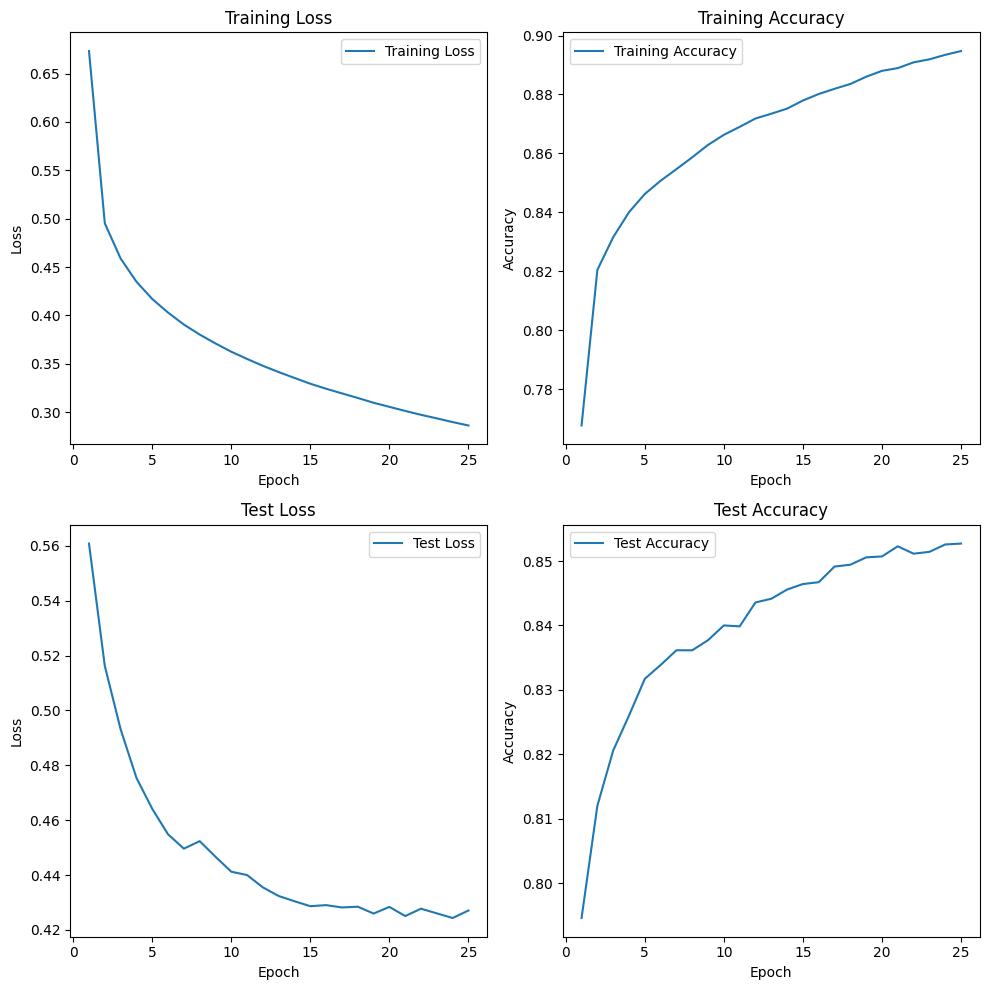

In [23]:
if MODE=="TRAIN" or MODE=="TRAIN2":
    # Train the second model
    model_2 = model_2()
    criterion_2 = nn.CrossEntropyLoss()
    optimizer_2 = optim.Adam(model_2.parameters(), lr=lr)
    model_2 = train_model(model_2, train_loader_7, test_loader_7, criterion_2, optimizer_2, 25, "/content/output/saved_models/model2.png")
    # Test the second model
    test_model(model_2, test_loader_7)
    print(count_parameters(model_2))

    # Save the trained model
    model_path = os.path.join('/content/output/saved_models', 'model_2_trained.pth')
    torch.save(model_2.state_dict(), model_path)
    print(f"Trained model-2 saved successfully at: {model_path}")

Training Epoch 0/23: 100%|██████████| 329/329 [00:01<00:00, 287.32batch/s]


Epoch 1/23, Train Loss: 0.8209, Train Accuracy: 69.93%, Test Loss: 0.5960, Test Accuracy: 78.03%


Training Epoch 1/23: 100%|██████████| 329/329 [00:01<00:00, 289.73batch/s]


Epoch 2/23, Train Loss: 0.5300, Train Accuracy: 80.90%, Test Loss: 0.5437, Test Accuracy: 80.31%


Training Epoch 2/23: 100%|██████████| 329/329 [00:01<00:00, 277.42batch/s]


Epoch 3/23, Train Loss: 0.4822, Train Accuracy: 82.53%, Test Loss: 0.5144, Test Accuracy: 81.16%


Training Epoch 3/23: 100%|██████████| 329/329 [00:01<00:00, 279.80batch/s]


Epoch 4/23, Train Loss: 0.4525, Train Accuracy: 83.50%, Test Loss: 0.4965, Test Accuracy: 81.87%


Training Epoch 4/23: 100%|██████████| 329/329 [00:01<00:00, 274.38batch/s]


Epoch 5/23, Train Loss: 0.4291, Train Accuracy: 84.18%, Test Loss: 0.4763, Test Accuracy: 82.70%


Training Epoch 5/23: 100%|██████████| 329/329 [00:01<00:00, 184.69batch/s]


Epoch 6/23, Train Loss: 0.4102, Train Accuracy: 84.84%, Test Loss: 0.4666, Test Accuracy: 83.06%


Training Epoch 6/23: 100%|██████████| 329/329 [00:01<00:00, 243.33batch/s]


Epoch 7/23, Train Loss: 0.3965, Train Accuracy: 85.20%, Test Loss: 0.4642, Test Accuracy: 82.99%


Training Epoch 7/23: 100%|██████████| 329/329 [00:01<00:00, 270.61batch/s]


Epoch 8/23, Train Loss: 0.3845, Train Accuracy: 85.67%, Test Loss: 0.4496, Test Accuracy: 83.59%


Training Epoch 8/23: 100%|██████████| 329/329 [00:01<00:00, 255.78batch/s]


Epoch 9/23, Train Loss: 0.3736, Train Accuracy: 86.01%, Test Loss: 0.4429, Test Accuracy: 83.90%


Training Epoch 9/23: 100%|██████████| 329/329 [00:01<00:00, 266.17batch/s]


Epoch 10/23, Train Loss: 0.3645, Train Accuracy: 86.35%, Test Loss: 0.4400, Test Accuracy: 84.30%


Training Epoch 10/23: 100%|██████████| 329/329 [00:01<00:00, 278.38batch/s]


Epoch 11/23, Train Loss: 0.3562, Train Accuracy: 86.60%, Test Loss: 0.4377, Test Accuracy: 84.37%


Training Epoch 11/23: 100%|██████████| 329/329 [00:01<00:00, 291.61batch/s]


Epoch 12/23, Train Loss: 0.3479, Train Accuracy: 86.94%, Test Loss: 0.4339, Test Accuracy: 84.84%


Training Epoch 12/23: 100%|██████████| 329/329 [00:01<00:00, 279.07batch/s]


Epoch 13/23, Train Loss: 0.3406, Train Accuracy: 87.20%, Test Loss: 0.4316, Test Accuracy: 84.79%


Training Epoch 13/23: 100%|██████████| 329/329 [00:01<00:00, 270.73batch/s]


Epoch 14/23, Train Loss: 0.3344, Train Accuracy: 87.47%, Test Loss: 0.4313, Test Accuracy: 85.01%


Training Epoch 14/23: 100%|██████████| 329/329 [00:01<00:00, 168.41batch/s]


Epoch 15/23, Train Loss: 0.3276, Train Accuracy: 87.68%, Test Loss: 0.4323, Test Accuracy: 84.94%


Training Epoch 15/23: 100%|██████████| 329/329 [00:01<00:00, 260.75batch/s]


Epoch 16/23, Train Loss: 0.3215, Train Accuracy: 87.94%, Test Loss: 0.4320, Test Accuracy: 84.86%


Training Epoch 16/23: 100%|██████████| 329/329 [00:01<00:00, 276.30batch/s]


Epoch 17/23, Train Loss: 0.3160, Train Accuracy: 88.08%, Test Loss: 0.4303, Test Accuracy: 85.37%


Training Epoch 17/23: 100%|██████████| 329/329 [00:01<00:00, 266.60batch/s]


Epoch 18/23, Train Loss: 0.3112, Train Accuracy: 88.31%, Test Loss: 0.4313, Test Accuracy: 85.24%


Training Epoch 18/23: 100%|██████████| 329/329 [00:01<00:00, 265.81batch/s]


Epoch 19/23, Train Loss: 0.3058, Train Accuracy: 88.55%, Test Loss: 0.4320, Test Accuracy: 85.31%


Training Epoch 19/23: 100%|██████████| 329/329 [00:01<00:00, 271.13batch/s]


Epoch 20/23, Train Loss: 0.3013, Train Accuracy: 88.75%, Test Loss: 0.4364, Test Accuracy: 85.36%


Training Epoch 20/23: 100%|██████████| 329/329 [00:01<00:00, 273.37batch/s]


Epoch 21/23, Train Loss: 0.2965, Train Accuracy: 88.87%, Test Loss: 0.4360, Test Accuracy: 85.54%


Training Epoch 21/23: 100%|██████████| 329/329 [00:01<00:00, 269.54batch/s]


Epoch 22/23, Train Loss: 0.2920, Train Accuracy: 89.05%, Test Loss: 0.4363, Test Accuracy: 85.49%


Training Epoch 22/23: 100%|██████████| 329/329 [00:01<00:00, 219.75batch/s]


Epoch 23/23, Train Loss: 0.2882, Train Accuracy: 89.21%, Test Loss: 0.4390, Test Accuracy: 85.57%
Test Accuracy: 85.57%
Layer: fc1.weight, Parameters: 47040
Layer: fc1.bias, Parameters: 60
Layer: fc2.weight, Parameters: 1680
Layer: fc2.bias, Parameters: 28
Layer: fc3.weight, Parameters: 392
Layer: fc3.bias, Parameters: 14
Layer: fc4.weight, Parameters: 98
Layer: fc4.bias, Parameters: 7
Total Trainable Parameters: 49319
49319
Trained model-3 saved successfully at: /content/output/saved_models/model_3_trained.pth


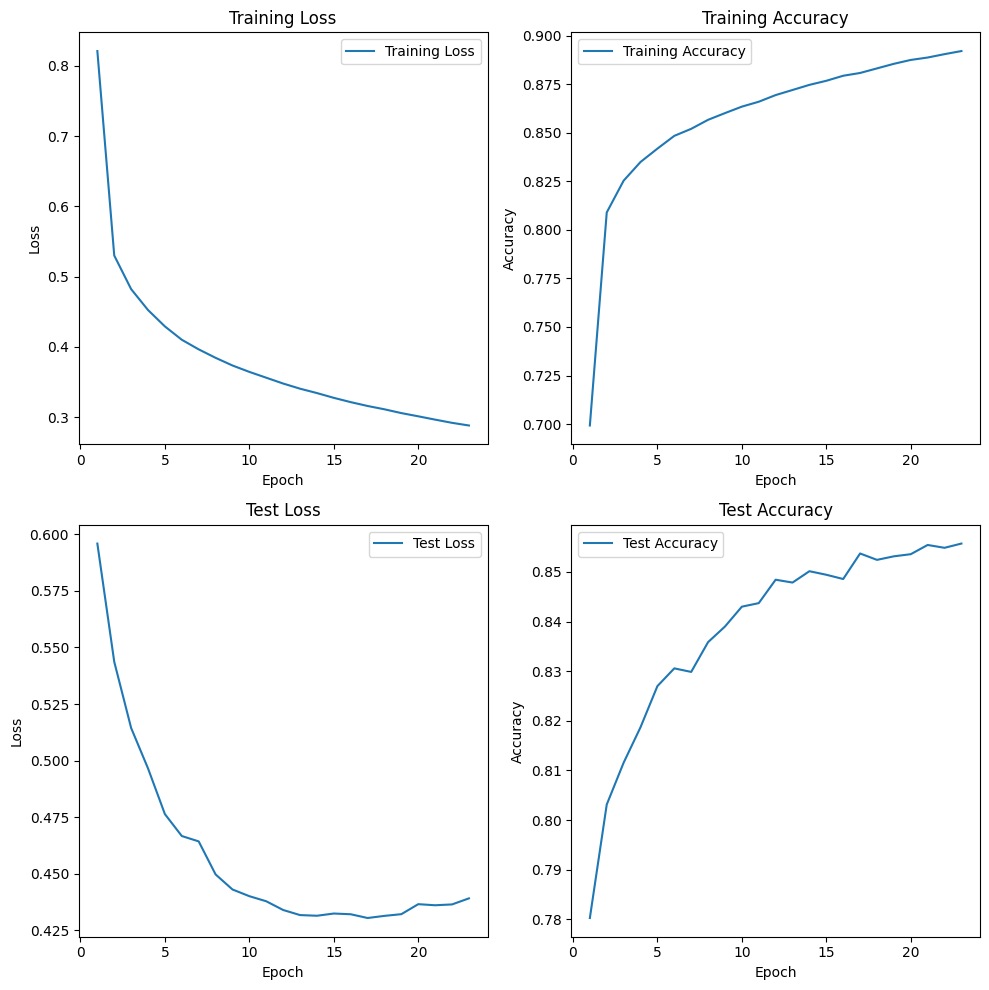

In [18]:
if MODE=="TRAIN" or MODE=="TRAIN3":
    # Train the third model
    model_3 = model_3()
    criterion_3 = nn.CrossEntropyLoss()
    optimizer_3 = optim.Adam(model_3.parameters(), lr=lr)
    model_3 = train_model(model_3, train_loader_7, test_loader_7, criterion_3, optimizer_3, 23, "/content/output/saved_models/model3.png")

    # Test the third model
    test_model(model_3, test_loader_7)
    print(count_parameters(model_3))

    # Save the trained model
    model_path = os.path.join('/content/output/saved_models', 'model_3_trained.pth')
    torch.save(model_3.state_dict(), model_path)
    print(f"Trained model-3 saved successfully at: {model_path}")

Layer: conv1.weight, Parameters: 180
Layer: conv1.bias, Parameters: 20
Layer: conv2.weight, Parameters: 7200
Layer: conv2.bias, Parameters: 40
Layer: conv3.weight, Parameters: 32400
Layer: conv3.bias, Parameters: 90
Layer: fc.weight, Parameters: 5670
Layer: fc.bias, Parameters: 7
Total Trainable Parameters: 45607
45607


Training Epoch 0/40: 100%|██████████| 329/329 [00:40<00:00,  8.03batch/s]


Epoch 1/40, Train Loss: 0.7635, Train Accuracy: 70.80%, Test Loss: 0.5592, Test Accuracy: 78.83%


Training Epoch 1/40: 100%|██████████| 329/329 [00:37<00:00,  8.70batch/s]


Epoch 2/40, Train Loss: 0.4960, Train Accuracy: 81.28%, Test Loss: 0.4758, Test Accuracy: 82.04%


Training Epoch 2/40: 100%|██████████| 329/329 [00:38<00:00,  8.60batch/s]


Epoch 3/40, Train Loss: 0.4371, Train Accuracy: 83.54%, Test Loss: 0.4309, Test Accuracy: 83.83%


Training Epoch 3/40: 100%|██████████| 329/329 [00:37<00:00,  8.67batch/s]


Epoch 4/40, Train Loss: 0.4015, Train Accuracy: 84.97%, Test Loss: 0.3866, Test Accuracy: 85.69%


Training Epoch 4/40: 100%|██████████| 329/329 [00:37<00:00,  8.77batch/s]


Epoch 5/40, Train Loss: 0.3806, Train Accuracy: 85.71%, Test Loss: 0.3707, Test Accuracy: 86.17%


Training Epoch 5/40: 100%|██████████| 329/329 [00:37<00:00,  8.80batch/s]


Epoch 6/40, Train Loss: 0.3629, Train Accuracy: 86.49%, Test Loss: 0.3540, Test Accuracy: 87.03%


Training Epoch 6/40: 100%|██████████| 329/329 [00:37<00:00,  8.79batch/s]


Epoch 7/40, Train Loss: 0.3463, Train Accuracy: 87.09%, Test Loss: 0.3420, Test Accuracy: 87.30%


Training Epoch 7/40: 100%|██████████| 329/329 [00:37<00:00,  8.88batch/s]


Epoch 8/40, Train Loss: 0.3395, Train Accuracy: 87.39%, Test Loss: 0.3337, Test Accuracy: 87.81%


Training Epoch 8/40: 100%|██████████| 329/329 [00:36<00:00,  8.90batch/s]


Epoch 9/40, Train Loss: 0.3268, Train Accuracy: 87.75%, Test Loss: 0.3237, Test Accuracy: 88.09%


Training Epoch 9/40: 100%|██████████| 329/329 [00:36<00:00,  9.02batch/s]


Epoch 10/40, Train Loss: 0.3210, Train Accuracy: 88.04%, Test Loss: 0.3216, Test Accuracy: 88.29%


Training Epoch 10/40: 100%|██████████| 329/329 [00:37<00:00,  8.83batch/s]


Epoch 11/40, Train Loss: 0.3107, Train Accuracy: 88.47%, Test Loss: 0.3172, Test Accuracy: 88.49%


Training Epoch 11/40: 100%|██████████| 329/329 [00:36<00:00,  8.89batch/s]


Epoch 12/40, Train Loss: 0.3021, Train Accuracy: 88.74%, Test Loss: 0.3146, Test Accuracy: 88.37%


Training Epoch 12/40: 100%|██████████| 329/329 [00:36<00:00,  8.89batch/s]


Epoch 13/40, Train Loss: 0.2957, Train Accuracy: 88.91%, Test Loss: 0.3118, Test Accuracy: 88.53%


Training Epoch 13/40: 100%|██████████| 329/329 [00:37<00:00,  8.88batch/s]


Epoch 14/40, Train Loss: 0.2911, Train Accuracy: 89.23%, Test Loss: 0.3110, Test Accuracy: 88.59%


Training Epoch 14/40: 100%|██████████| 329/329 [00:36<00:00,  8.89batch/s]


Epoch 15/40, Train Loss: 0.2861, Train Accuracy: 89.32%, Test Loss: 0.3014, Test Accuracy: 89.06%


Training Epoch 15/40: 100%|██████████| 329/329 [00:36<00:00,  8.96batch/s]


Epoch 16/40, Train Loss: 0.2797, Train Accuracy: 89.57%, Test Loss: 0.2939, Test Accuracy: 89.33%


Training Epoch 16/40: 100%|██████████| 329/329 [00:37<00:00,  8.87batch/s]


Epoch 17/40, Train Loss: 0.2749, Train Accuracy: 89.85%, Test Loss: 0.3042, Test Accuracy: 88.79%


Training Epoch 17/40: 100%|██████████| 329/329 [00:36<00:00,  8.91batch/s]


Epoch 18/40, Train Loss: 0.2726, Train Accuracy: 89.76%, Test Loss: 0.3029, Test Accuracy: 88.96%


Training Epoch 18/40: 100%|██████████| 329/329 [00:37<00:00,  8.89batch/s]


Epoch 19/40, Train Loss: 0.2660, Train Accuracy: 90.15%, Test Loss: 0.3026, Test Accuracy: 89.10%


Training Epoch 19/40: 100%|██████████| 329/329 [00:36<00:00,  8.91batch/s]


Epoch 20/40, Train Loss: 0.2635, Train Accuracy: 90.25%, Test Loss: 0.2949, Test Accuracy: 89.17%


Training Epoch 20/40: 100%|██████████| 329/329 [00:36<00:00,  8.92batch/s]


Epoch 21/40, Train Loss: 0.2592, Train Accuracy: 90.33%, Test Loss: 0.2921, Test Accuracy: 89.40%


Training Epoch 21/40: 100%|██████████| 329/329 [00:36<00:00,  8.93batch/s]


Epoch 22/40, Train Loss: 0.2559, Train Accuracy: 90.60%, Test Loss: 0.3030, Test Accuracy: 88.94%


Training Epoch 22/40: 100%|██████████| 329/329 [00:36<00:00,  8.96batch/s]


Epoch 23/40, Train Loss: 0.2519, Train Accuracy: 90.65%, Test Loss: 0.2839, Test Accuracy: 89.31%


Training Epoch 23/40: 100%|██████████| 329/329 [00:36<00:00,  8.97batch/s]


Epoch 24/40, Train Loss: 0.2501, Train Accuracy: 90.65%, Test Loss: 0.2824, Test Accuracy: 89.69%


Training Epoch 24/40: 100%|██████████| 329/329 [00:36<00:00,  8.96batch/s]


Epoch 25/40, Train Loss: 0.2462, Train Accuracy: 90.79%, Test Loss: 0.3062, Test Accuracy: 88.79%


Training Epoch 25/40: 100%|██████████| 329/329 [00:36<00:00,  8.91batch/s]


Epoch 26/40, Train Loss: 0.2432, Train Accuracy: 91.01%, Test Loss: 0.3015, Test Accuracy: 88.79%


Training Epoch 26/40: 100%|██████████| 329/329 [00:36<00:00,  8.96batch/s]


Epoch 27/40, Train Loss: 0.2395, Train Accuracy: 91.08%, Test Loss: 0.2806, Test Accuracy: 89.64%


Training Epoch 27/40: 100%|██████████| 329/329 [00:36<00:00,  8.98batch/s]


Epoch 28/40, Train Loss: 0.2362, Train Accuracy: 91.05%, Test Loss: 0.2996, Test Accuracy: 89.13%


Training Epoch 28/40: 100%|██████████| 329/329 [00:36<00:00,  8.94batch/s]


Epoch 29/40, Train Loss: 0.2355, Train Accuracy: 91.10%, Test Loss: 0.2983, Test Accuracy: 89.13%


Training Epoch 29/40: 100%|██████████| 329/329 [00:36<00:00,  9.00batch/s]


Epoch 30/40, Train Loss: 0.2328, Train Accuracy: 91.42%, Test Loss: 0.2882, Test Accuracy: 89.47%


Training Epoch 30/40: 100%|██████████| 329/329 [00:36<00:00,  8.97batch/s]


Epoch 31/40, Train Loss: 0.2332, Train Accuracy: 91.27%, Test Loss: 0.2936, Test Accuracy: 89.33%


Training Epoch 31/40: 100%|██████████| 329/329 [00:36<00:00,  9.04batch/s]


Epoch 32/40, Train Loss: 0.2273, Train Accuracy: 91.45%, Test Loss: 0.2916, Test Accuracy: 89.53%


Training Epoch 32/40: 100%|██████████| 329/329 [00:36<00:00,  8.99batch/s]


Epoch 33/40, Train Loss: 0.2257, Train Accuracy: 91.61%, Test Loss: 0.2885, Test Accuracy: 89.31%


Training Epoch 33/40: 100%|██████████| 329/329 [00:36<00:00,  8.98batch/s]


Epoch 34/40, Train Loss: 0.2263, Train Accuracy: 91.44%, Test Loss: 0.2800, Test Accuracy: 89.33%


Training Epoch 34/40: 100%|██████████| 329/329 [00:36<00:00,  9.01batch/s]


Epoch 35/40, Train Loss: 0.2213, Train Accuracy: 91.71%, Test Loss: 0.2838, Test Accuracy: 89.26%


Training Epoch 35/40: 100%|██████████| 329/329 [00:36<00:00,  8.97batch/s]


Epoch 36/40, Train Loss: 0.2224, Train Accuracy: 91.59%, Test Loss: 0.2766, Test Accuracy: 89.94%


Training Epoch 36/40: 100%|██████████| 329/329 [00:36<00:00,  9.02batch/s]


Epoch 37/40, Train Loss: 0.2178, Train Accuracy: 91.77%, Test Loss: 0.2931, Test Accuracy: 89.27%


Training Epoch 37/40: 100%|██████████| 329/329 [00:36<00:00,  8.97batch/s]


Epoch 38/40, Train Loss: 0.2135, Train Accuracy: 92.05%, Test Loss: 0.2776, Test Accuracy: 89.81%


Training Epoch 38/40: 100%|██████████| 329/329 [00:36<00:00,  8.95batch/s]


Epoch 39/40, Train Loss: 0.2144, Train Accuracy: 92.03%, Test Loss: 0.2805, Test Accuracy: 89.71%


Training Epoch 39/40: 100%|██████████| 329/329 [00:36<00:00,  8.94batch/s]


Epoch 40/40, Train Loss: 0.2148, Train Accuracy: 91.95%, Test Loss: 0.2764, Test Accuracy: 89.84%
Test Accuracy: 89.84%
Trained model-4 saved successfully at: /content/output/saved_models/model_4_trained.pth


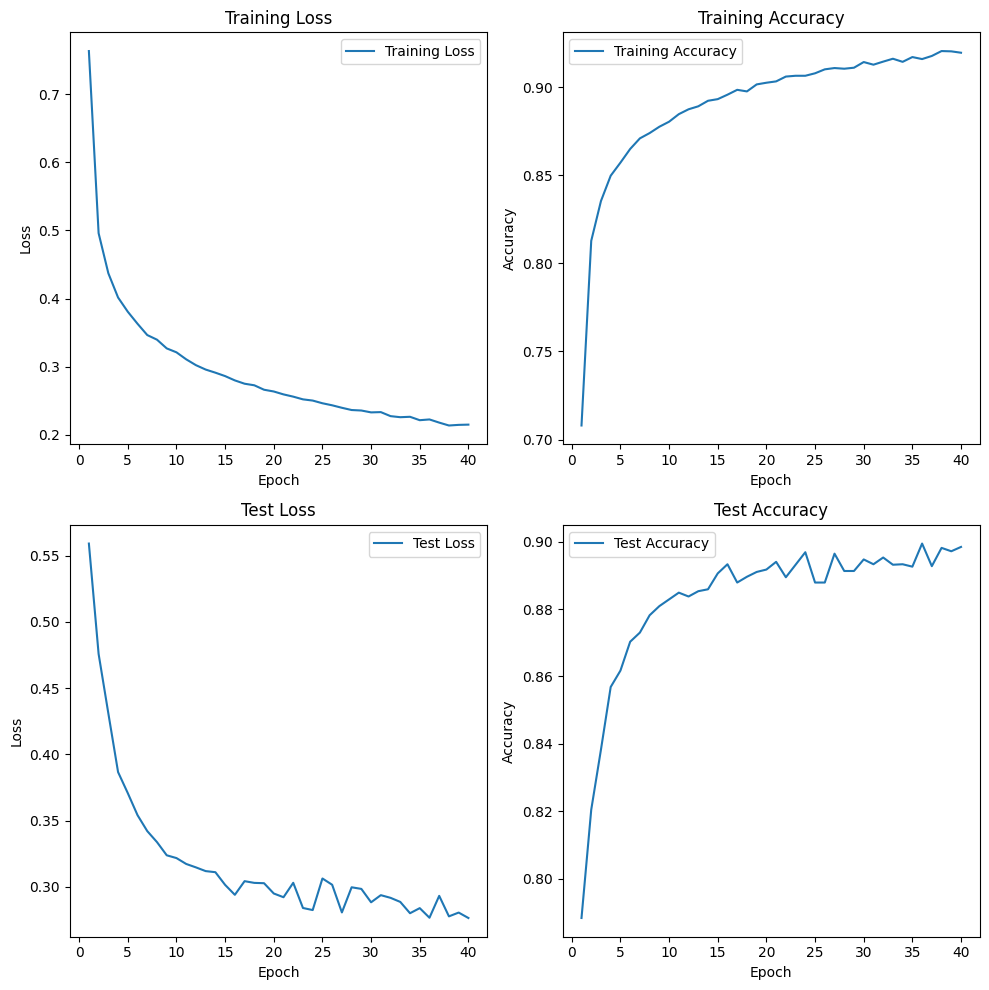

In [19]:
if MODE=="TRAIN" or MODE=="TRAIN4":
    # Train the forth model
    model_4 = model_4()
    criterion_4 = nn.CrossEntropyLoss()
    optimizer_4 = optim.Adam(model_4.parameters(), lr=lr)
    print(count_parameters(model_4))
    model_4 = train_model(model_4, train_loader_7, test_loader_7, criterion_4, optimizer_4, 40, "/content/output/saved_models/model4.png")
    # Test the forth model
    test_model(model_4, test_loader_7)

    # Save the trained model
    model_path = os.path.join('/content/output/saved_models', 'model_4_trained.pth')
    torch.save(model_4.state_dict(), model_path)
    print(f"Trained model-4 saved successfully at: {model_path}")